In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# Read all data
df = pd.read_json("synopsys_results.json")

## Multiplication

In [3]:
mul_df = df.query('Design == "exact_mul" | Design == "approx_mul"')

# Replace labels
mul_df.loc[mul_df['Design']=='exact_mul', 'Design'] = 'Exact'
mul_df.loc[mul_df['Design']=='approx_mul', 'Design'] = 'Approx'

mul_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
0,Exact,32,0,MET,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Exact,32,50,MET,7544.980847,14.7204,3.53,51963.012,26633.782390
2,Exact,32,100,MET,7544.980847,14.7204,3.53,51963.012,26633.782390
3,Exact,32,150,MET,7544.980847,14.7169,3.53,51950.657,26633.782390
4,Exact,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.782390


In [4]:
# Remove non-constrained case and violation of timing constraint
mul_df = mul_df.query('Slack == "MET" & Freq != 0')

mul_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
1,Exact,32,50,MET,7544.980847,14.7204,3.53,51963.012,26633.78239
2,Exact,32,100,MET,7544.980847,14.7204,3.53,51963.012,26633.78239
3,Exact,32,150,MET,7544.980847,14.7169,3.53,51950.657,26633.78239
4,Exact,32,200,MET,7544.980847,14.7186,3.53,51956.658,26633.78239
5,Exact,32,250,MET,7544.980847,14.7290,3.53,51993.370,26633.78239


In [5]:
area_df = mul_df[["Area", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
power_df = mul_df[["Power", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = mul_df[["Delay", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = mul_df[["Energy", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = mul_df[["ADP", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)

energy_df.head()

Energy           
Design      Exact     Approx
Freq                        
50      51963.012  11152.404
100     51963.012  11152.404
150     51950.657  11153.376
200     51956.658  11153.376
250     51993.370  11141.064

In [6]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Approx'] / area_df['Area']['Exact']
power_gain = 100 * power_df['Power']['Approx'] / power_df['Power']['Exact']
delay_gain = 100 * delay_df['Delay']['Approx'] / delay_df['Delay']['Exact']
energy_gain = 100 * energy_df['Energy']['Approx'] / energy_df['Energy']['Exact']
adp_gain = 100 * ADP_df['ADP']['Approx'] / ADP_df['ADP']['Exact']

# # X times reduction
# area_gain = area_df['Area']['Exact'] / area_df['Area']['Approx']
# power_gain = power_df['Power']['Exact'] / power_df['Power']['Approx']
# delay_gain = delay_df['Delay']['Exact'] / delay_df['Delay']['Approx']
# energy_gain = energy_df['Energy']['Exact'] / energy_df['Energy']['Approx']
# adp_gain = ADP_df['ADP']['Exact'] / ADP_df['ADP']['Approx']

energy_gain

Freq
50      21.462197
100     21.462197
150     21.469172
200     21.466692
250     21.427855
300     24.076422
350     19.366436
400     18.913457
450     16.651976
500     14.407808
550     12.282013
600           NaN
650           NaN
700           NaN
750           NaN
800           NaN
850           NaN
900           NaN
950           NaN
1000          NaN
1050          NaN
1100          NaN
1150          NaN
dtype: float64

In [7]:
gain_df = pd.DataFrame([
    area_gain,
    power_gain,
    # delay_gain,
    adp_gain,
    energy_gain,
]
).T.dropna()

gain_df.columns = [
    'Area', 
    'Power',
    # 'Delay',
    'ADP',
    'Energy',
    ]

### Plots

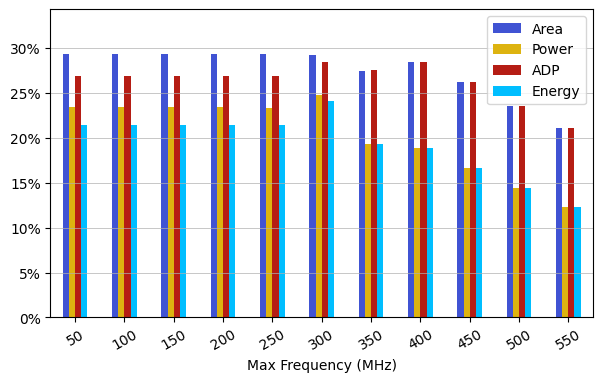

In [8]:
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']
# colors = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']


# ax = (100-(1/gain_df)*100).plot.bar(
ax = (gain_df).plot.bar(
    rot=30,
    color=colors,
    figsize=(7,4)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%dx'))
plt.ylim(0, 34.3)

# ax.set_yticks(range(70, 115+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.1, 1))
plt.legend(loc='upper right')
# plt.title('Hardware requirements of HUB Posit adder with respect to standard adder')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/mult_rate.pdf', bbox_inches="tight")
plt.show()

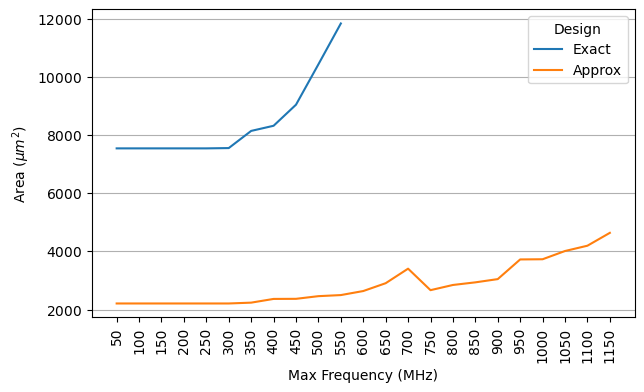

In [9]:
ax1 = area_df.plot.line(
	y="Area",
	rot = 90,
	ylabel="Area ($\mu m^2$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
ax1.yaxis.set_major_formatter(mtick.ScalarFormatter(useOffset=False, useMathText=True))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_area.pdf', bbox_inches="tight")
plt.show()

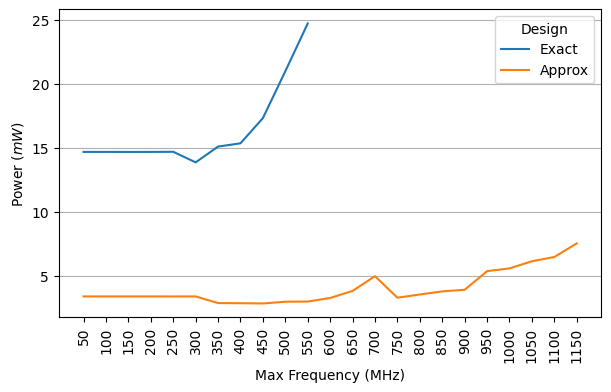

In [10]:
ax1 = power_df.plot.line(
	y="Power",
	rot = 90,
	ylabel="Power ($mW$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_power.pdf', bbox_inches="tight")
plt.show()

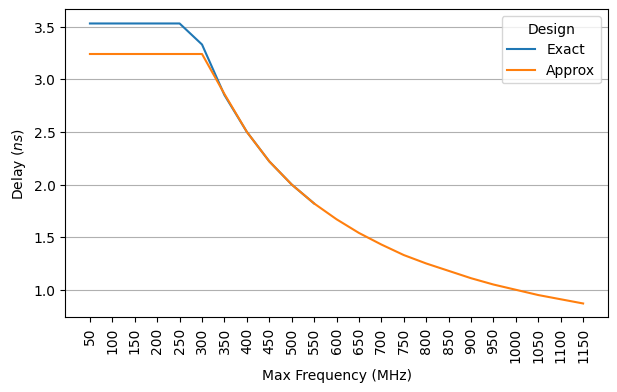

In [11]:
ax1 = delay_df.plot.line(
	y="Delay",
	rot = 90,
	ylabel="Delay ($ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_delay.pdf', bbox_inches="tight")
plt.show()

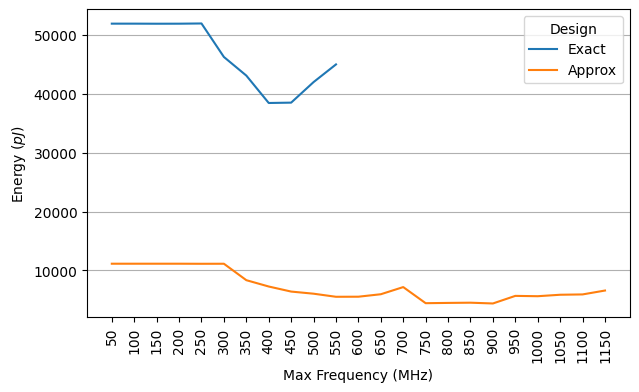

In [12]:
ax1 = energy_df.plot.line(
    y="Energy",
    rot = 90,
    ylabel="Energy ($pJ$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_energy.pdf', bbox_inches="tight")
plt.show()

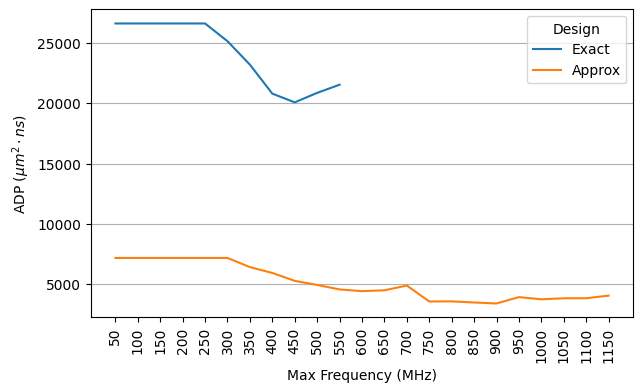

In [13]:
ax1 = ADP_df.plot.line(
	y="ADP",
	rot = 90,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/mult_adp.pdf', bbox_inches="tight")
plt.show()

## Division

In [14]:
div_df = df.query('Design == "exact_div" | Design == "approx_div"')

# Replace labels
div_df.loc[div_df['Design']=='exact_div', 'Design'] = 'Exact'
div_df.loc[div_df['Design']=='approx_div', 'Design'] = 'Approx'

div_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
25,Exact,32,0,MET,10349.740784,25.7478,27.61,710896.758,285756.343046
26,Exact,32,50,MET,12196.060889,30.8490,20.00,616980.000,243921.217780
27,Exact,32,100,MET,17417.736080,42.3292,8.59,363607.828,149618.352927
28,Exact,32,150,MET,18657.475294,38.8281,6.66,258595.146,124258.785458
29,Exact,32,200,VIOLATED,26576.659447,63.2516,5.15,325745.740,136869.796152


In [15]:
# Remove non-constrained case and violation of timing constraint
div_df = div_df.query('Slack == "MET" & Freq != 0')

div_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
26,Exact,32,50,MET,12196.060889,30.8490,20.00,616980.000,243921.217780
27,Exact,32,100,MET,17417.736080,42.3292,8.59,363607.828,149618.352927
28,Exact,32,150,MET,18657.475294,38.8281,6.66,258595.146,124258.785458
86,Approx,32,50,MET,2233.929592,3.4699,3.24,11242.476,7237.931878
87,Approx,32,100,MET,2233.929592,3.4699,3.24,11242.476,7237.931878


In [16]:
area_df = div_df[["Area", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
power_df = div_df[["Power", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = div_df[["Delay", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = div_df[["Energy", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = div_df[["ADP", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design         Exact       Approx
Freq                             
50      12196.060889  2233.929592
100     17417.736080  2233.929592
150     18657.475294  2233.929592
200              NaN  2233.929592
250              NaN  2233.929592

In [17]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Approx'] / area_df['Area']['Exact']
power_gain = 100 * power_df['Power']['Approx'] / power_df['Power']['Exact']
delay_gain = 100 * delay_df['Delay']['Approx'] / delay_df['Delay']['Exact']
energy_gain = 100 * energy_df['Energy']['Approx'] / energy_df['Energy']['Exact']
adp_gain = 100 * ADP_df['ADP']['Approx'] / ADP_df['ADP']['Exact']

# # X times reduction
# area_gain = area_df['Area']['Exact'] / area_df['Area']['Approx']
# power_gain = power_df['Power']['Exact'] / power_df['Power']['Approx']
# delay_gain = delay_df['Delay']['Exact'] / delay_df['Delay']['Approx']
# energy_gain = energy_df['Energy']['Exact'] / energy_df['Energy']['Approx']
# adp_gain = ADP_df['ADP']['Exact'] / ADP_df['ADP']['Approx']

energy_gain

Freq
50      1.822178
100     3.091924
150     4.347896
200          NaN
250          NaN
300          NaN
350          NaN
400          NaN
450          NaN
500          NaN
550          NaN
600          NaN
650          NaN
700          NaN
750          NaN
800          NaN
850          NaN
900          NaN
950          NaN
1000         NaN
1050         NaN
1100         NaN
1150         NaN
dtype: float64

In [18]:
gain_df = pd.DataFrame([
    area_gain,
    power_gain,
    # delay_gain,
    adp_gain,
    energy_gain,
]
).T.dropna()

gain_df.columns = [
    'Area', 
    'Power',
    # 'Delay', 
    'ADP',
    'Energy', 
    ]

### Plots

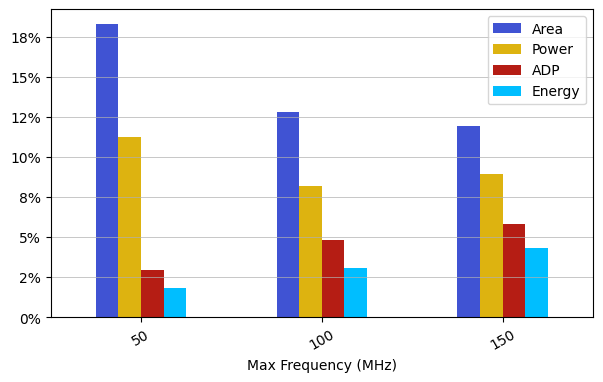

In [19]:
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']
# colors = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']


# ax = (100-(1/gain_df)*100).plot.bar(
ax = (gain_df).plot.bar(
    rot=30,
    color=colors,
    figsize=(7,4)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# plt.ylim(70, 100)

# ax.set_yticks(range(70, 115+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.legend(loc='lower right')
# plt.title('Hardware requirements of HUB Posit adder with respect to standard adder')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/div_rate.pdf', bbox_inches="tight")
plt.show()

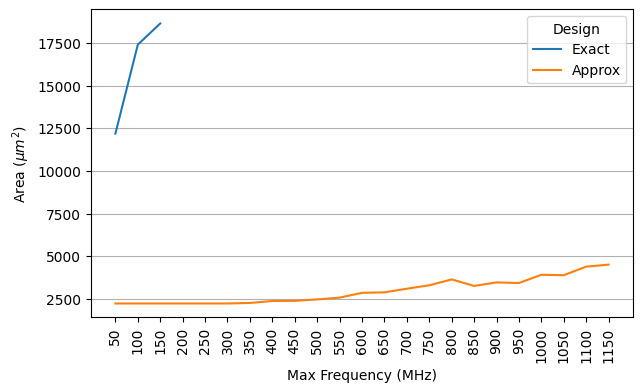

In [20]:
ax1 = area_df.plot.line(
	y="Area",
	rot = 90,
	ylabel="Area ($\mu m^2$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/div_area.pdf', bbox_inches="tight")
plt.show()

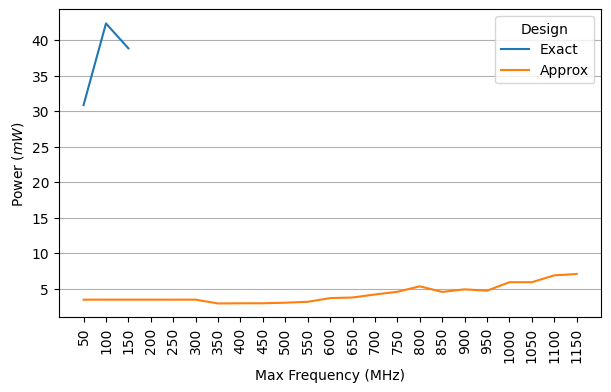

In [21]:
ax1 = power_df.plot.line(
	y="Power",
	rot = 90,
	ylabel="Power ($mW$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/div_power.pdf', bbox_inches="tight")
plt.show()

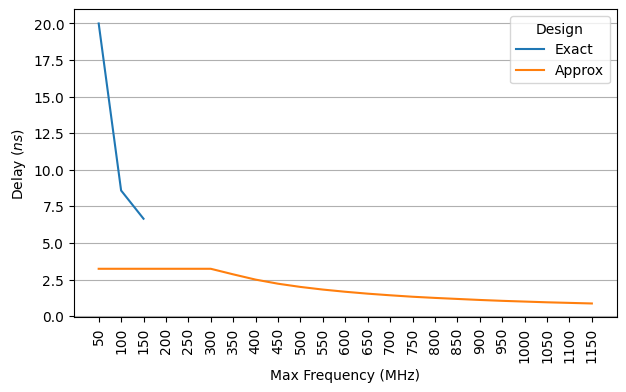

In [22]:
ax1 = delay_df.plot.line(
	y="Delay",
	rot = 90,
	ylabel="Delay ($ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/div_delay.pdf', bbox_inches="tight")
plt.show()

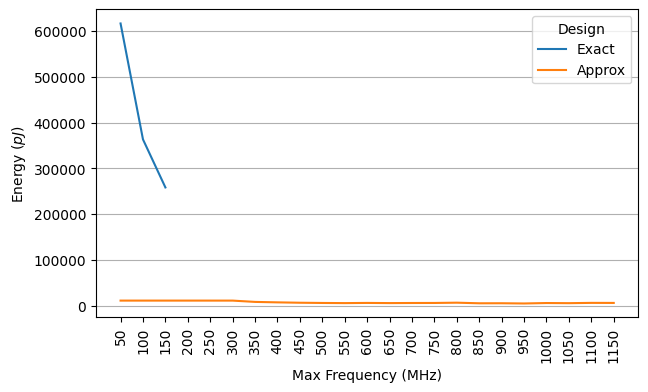

In [23]:
ax1 = energy_df.plot.line(
    y="Energy",
    rot = 90,
    ylabel="Energy ($pJ$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/div_energy.pdf', bbox_inches="tight")
plt.show()

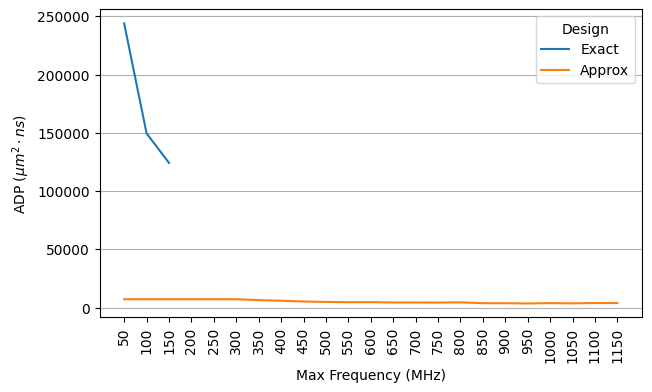

In [24]:
ax1 = ADP_df.plot.line(
	y="ADP",
	rot = 90,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/div_adp.pdf', bbox_inches="tight")
plt.show()

## Square Root

In [25]:
sqrt_df = df.query('Design == "exact_sqrt" | Design == "approx_sqrt"')

# Replace labels
sqrt_df.loc[sqrt_df['Design']=='exact_sqrt', 'Design'] = 'Exact'
sqrt_df.loc[sqrt_df['Design']=='approx_sqrt', 'Design'] = 'Approx'

sqrt_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
47,Exact,32,0,MET,8066.184019,15.7474,13.84,217944.016,111635.986823
48,Exact,32,50,MET,8038.900814,16.6224,13.17,218917.008,105872.323720
49,Exact,32,100,MET,8964.883252,17.7411,10.00,177411.000,89648.832520
50,Exact,32,150,MET,13460.966482,24.0539,6.12,147209.868,82381.114870
51,Exact,32,200,MET,13667.707284,21.0610,5.00,105305.000,68338.536420


In [26]:
# Remove non-constrained case and violation of timing constraint
sqrt_df = sqrt_df.query('Slack == "MET" & Freq != 0')

sqrt_df.head()

,Design,Bits,Freq,Slack,Area,Power,Delay,Energy,ADP
48,Exact,32,50,MET,8038.900814,16.6224,13.17,218917.008,105872.323720
49,Exact,32,100,MET,8964.883252,17.7411,10.00,177411.000,89648.832520
50,Exact,32,150,MET,13460.966482,24.0539,6.12,147209.868,82381.114870
51,Exact,32,200,MET,13667.707284,21.0610,5.00,105305.000,68338.536420
52,Exact,32,250,MET,15543.427333,25.9404,4.00,103761.600,62173.709332


In [27]:
area_df = sqrt_df[["Area", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
power_df = sqrt_df[["Power", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
delay_df = sqrt_df[["Delay", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
energy_df = sqrt_df[["Energy", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)
ADP_df = sqrt_df[["ADP", "Design", "Freq"]].groupby(["Design", "Freq"], sort=False).sum().unstack(0)

area_df.head()

Area             
Design         Exact       Approx
Freq                             
50       8038.900814  1406.731193
100      8964.883252  1406.731193
150     13460.966482  1406.731193
200     13667.707284  1406.731193
250     15543.427333  1406.731193

In [28]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Approx'] / area_df['Area']['Exact']
power_gain = 100 * power_df['Power']['Approx'] / power_df['Power']['Exact']
delay_gain = 100 * delay_df['Delay']['Approx'] / delay_df['Delay']['Exact']
energy_gain = 100 * energy_df['Energy']['Approx'] / energy_df['Energy']['Exact']
adp_gain = 100 * ADP_df['ADP']['Approx'] / ADP_df['ADP']['Exact']

# # X times reduction
# area_gain = area_df['Area']['Exact'] / area_df['Area']['Approx']
# power_gain = power_df['Power']['Exact'] / power_df['Power']['Approx']
# delay_gain = delay_df['Delay']['Exact'] / delay_df['Delay']['Approx']
# energy_gain = energy_df['Energy']['Exact'] / energy_df['Energy']['Approx']
# adp_gain = ADP_df['ADP']['Exact'] / ADP_df['ADP']['Approx']

energy_gain

Freq
50      2.023292
100     2.496649
150     3.009962
200     4.205528
250     4.268756
300          NaN
350          NaN
400          NaN
450          NaN
500          NaN
550          NaN
600          NaN
650          NaN
700          NaN
750          NaN
800          NaN
850          NaN
900          NaN
950          NaN
1000         NaN
1050         NaN
1100         NaN
1150         NaN
1200         NaN
dtype: float64

In [29]:
gain_df = pd.DataFrame([
    area_gain,
    power_gain,
    # delay_gain,
    adp_gain,
    energy_gain,
]
).T.dropna()

gain_df.columns = [
    'Area', 
    'Power',
    # 'Delay', 
    'ADP',
    'Energy', 
    ]

### Plots

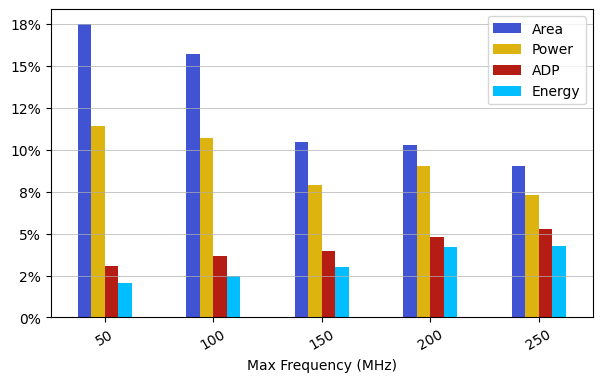

In [30]:
colors = ['#4053D3', '#DDB310', '#B51D14', '#00BEFF', '#FB49B0', '#00B25D']
# colors = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']


# ax = (100-(1/gain_df)*100).plot.bar(
ax = (gain_df).plot.bar(
    rot=30,
    color=colors,
    figsize=(7,4)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# plt.ylim(60, 100)

# ax.set_yticks(range(70, 115+1, 5))

# plt.hlines(y=100, xmin=-100, xmax=100, linewidth=0.75, color='gray')
# plt.legend(loc='upper center', ncol=1, bbox_to_anchor=(1.12, 1))
plt.legend(loc='best')
# plt.title('Hardware requirements of HUB Posit adder with respect to standard adder')
plt.xlabel('Max Frequency (MHz)')
plt.grid(True, axis='y', linewidth=0.5)

plt.savefig('figs/sqrt_rate.pdf', bbox_inches="tight")
plt.show()

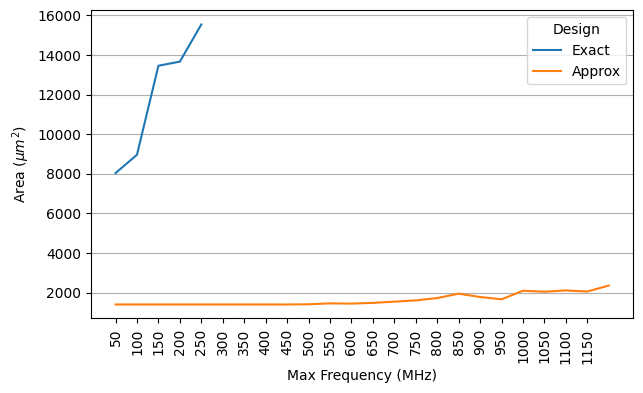

In [31]:
ax1 = area_df.plot.line(
	y="Area",
	rot = 90,
	ylabel="Area ($\mu m^2$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/sqrt_area.pdf', bbox_inches="tight")
plt.show()

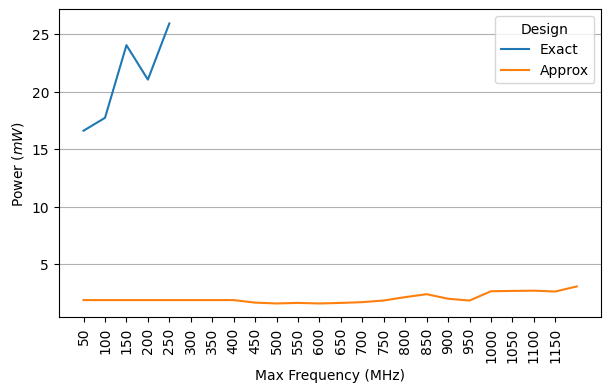

In [32]:
ax1 = power_df.plot.line(
	y="Power",
	rot = 90,
	ylabel="Power ($mW$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/sqrt_power.pdf', bbox_inches="tight")
plt.show()

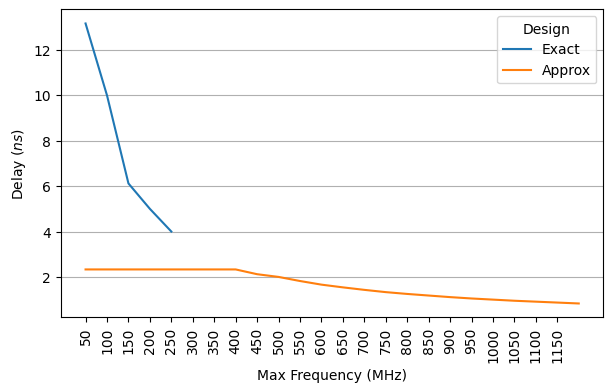

In [33]:
ax1 = delay_df.plot.line(
	y="Delay",
	rot = 90,
	ylabel="Delay ($ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/sqrt_delay.pdf', bbox_inches="tight")
plt.show()

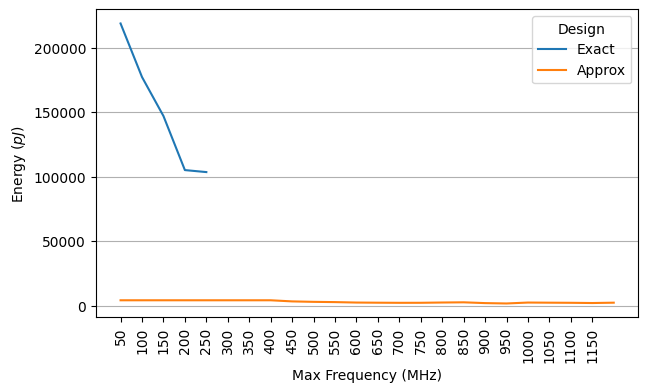

In [34]:
ax1 = energy_df.plot.line(
    y="Energy",
    rot = 90,
    ylabel="Energy ($pJ$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/sqrt_energy.pdf', bbox_inches="tight")
plt.show()

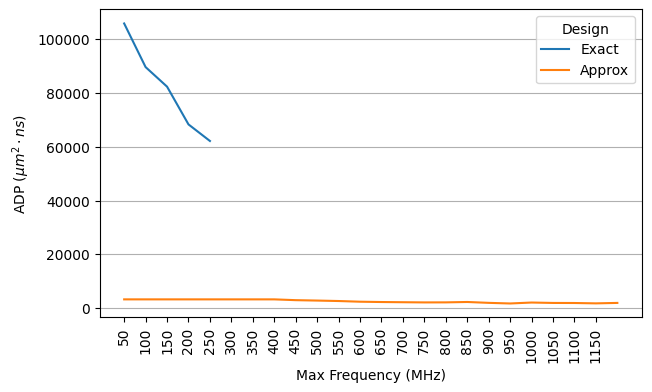

In [35]:
ax1 = ADP_df.plot.line(
	y="ADP",
	rot = 90,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
    figsize=(7,4)
)
ax1.set_xticks(range(50,1200,50))
# ax1.set_xlim(50)
# ax1.set_ylim(0)
ax1.grid(True, axis="y")

# plt.grid(False, axis="x")
plt.xlabel('Max Frequency (MHz)')
plt.savefig('figs/sqrt_adp.pdf', bbox_inches="tight")
plt.show()